# Compare future temperature pathways from KNMI14, CMIP5 and CMIP6

In [57]:
import os
import importlib

import numpy as np
import pandas as pd
import xarray as xr
import IPython.display
import matplotlib.pyplot as plt

import sys
sys.path.append('../code')
import func_misc as misc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [58]:
importlib.reload(misc)

<module 'func_misc' from '../code/func_misc.py'>

In [5]:
data_path = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'

DIR_T_cmip5 = f'{data_path}Data_AR5/Tglobal/'
DIR_T_cmip6 = f'{data_path}Data_cmip6/tas_global_averaged_climate_explorer/'

In [46]:
def ds2df(da):
    '''Transform an xarray DataArray to a pandas DataFrame with models as 
    column'''

    df = pd.DataFrame(dict(time=da.time))
    df = df.set_index('time')

    for mod in da.model.values:
        df[mod] = da.sel(model=mod).drop('model').to_dataframe()
        
    return df

In [59]:
SCE = 'rcp45'
start_date = 1850
ye = 2100

TGLOB_cmip5 = misc.tglob_cmip( DIR_T_cmip5, 'CMIP5', SCE, start_date, ye)
TGLOB_cmip5 = TGLOB_cmip5 - TGLOB_cmip5.sel(time=slice(1890,1900)).mean(dim='time')

TGLOB_cmip5_df = ds2df(TGLOB_cmip5)
TGLOB_cmip5_df

,CSIRO-Mk3-6-0,CanESM2,EC-EARTH,IPSL-CM5A-MR,CMCC-CM,bcc-csm1-1-m,MIROC-ESM-CHEM,MIROC5,IPSL-CM5A-LR,MRI-CGCM3,...,ACCESS1-0,GISS-E2-R,MPI-ESM-LR,HadGEM2-ES,CNRM-CM5,GFDL-ESM2M,MPI-ESM-MR,bcc-csm1-1,NorESM1-M,inmcm4
time,,,,,,,,,,,,,,,,,,,,,
1850,-0.109548,-0.090895,0.124648,-0.115165,-0.123404,-0.589266,-0.078537,0.012280,0.330383,-0.088364,...,0.163998,0.035125,-0.097774,NaN,-0.216143,NaN,0.185812,-0.092334,-0.027033,-0.076151
1851,-0.083156,0.086280,0.240957,-0.117848,-0.114104,-0.483316,0.055338,0.013146,0.213991,-0.013314,...,0.056564,0.032767,0.038392,NaN,-0.237552,NaN,0.223620,-0.185201,-0.074183,-0.029759
1852,0.122619,0.003905,0.240340,-0.090673,0.055555,-0.544483,-0.007579,0.086513,0.227658,-0.042348,...,0.077006,0.026942,0.086042,NaN,-0.212185,NaN,0.221187,-0.173551,0.031500,-0.094834
1853,0.070152,0.081096,0.438832,0.120193,-0.112695,-0.379424,0.078021,0.172221,0.246524,-0.006056,...,0.268881,0.023375,0.176709,NaN,-0.042077,NaN,0.231870,-0.022117,-0.092458,-0.028392
1854,-0.064423,0.289571,0.222898,0.111085,-0.239295,-0.207766,0.042321,0.014480,0.235849,-0.039581,...,0.309156,0.014817,0.319334,NaN,-0.336543,NaN,0.252912,-0.098776,-0.095392,-0.064884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2.618777,2.978913,2.798557,3.242693,2.514980,2.357834,3.206838,2.229713,3.369691,2.145077,...,2.815573,1.832533,2.702851,2.915339,2.559257,1.893607,2.639104,2.334391,2.314733,1.899008
2097,2.736419,3.001688,2.717315,3.139693,2.627546,2.394859,3.303130,2.367255,3.435424,2.027719,...,2.877339,1.890225,2.526034,3.060348,2.457882,1.542882,2.732037,2.421399,2.281033,1.780866
2098,2.788494,3.301196,2.763223,3.047560,2.663996,2.420817,3.219321,2.371063,3.349658,2.086427,...,3.029898,1.859333,2.360617,3.078123,2.433898,1.627582,2.971962,2.375041,2.265975,1.788166


In [60]:
def edit_scen_name(sce):
    '''Convert name from rcp85 to RCP8.5 and ssp585 to SSP5-8.5'''
    
    if 'rcp' in sce:
        sce_out = f'{sce[0:3].upper()}{sce[3]}.{sce[4]}'
    elif 'ssp' in sce:
        sce_out = f'{sce[0:3].upper()}{sce[3]}-{sce[4]}.{sce[5]}'
    else:
        print('Scenario name not recognised')
    
    return sce_out

In [85]:
def make_summary_df(perc, years_ref_s, years_ref_e, years_s, years_e, mip, 
                    index=None):
    
    scen_dic = {'cmip5': ['Not available', 'rcp26', 'rcp45', 'rcp85'],
               'cmip6': ['ssp126', 'ssp245', 'ssp585']}

    dir_dic = {'cmip5': f'{data_path}Data_AR5/Tglobal/',
               'cmip6': f'{data_path}Data_cmip6/tas_global_averaged_climate_explorer/'}
    
    col = [f'{mip.upper()} Scenario']
    for p in perc:
        col.append(f'Percentile: {p}')
        
    summary_df = pd.DataFrame(columns=col)
    
    for idx, sce in enumerate(scen_dic[mip]):
        print(f'sce: {sce}')
        if sce == 'Not available':
            summary_df.loc[0] = ['Not available']*(len(perc)+1)
        
        else:
            cmip_da = misc.tglob_cmip(dir_dic[mip], mip.upper(), sce, 1880, 2100)
            cmip_da = cmip_da - cmip_da.sel(time=slice(years_ref_s, years_ref_e)).mean(dim='time')
            cmip_df = ds2df(cmip_da)
            mean_df = cmip_df.loc[years_s:years_e].mean(axis=0)
            val = [edit_scen_name(sce)]
            for p in perc:
                val.append(round(mean_df.quantile(p/100),2))
            summary_df.loc[idx] = val
            
    if index == 'percentiles':
        summary_df.set_index(col[0], inplace=True)
        summary_df = summary_df.T
            
    return summary_df

In [86]:
def summary_fig_and_table(ax, df, colors=None, vlines=False):
    
    mi = 0.6 # Max color intensity
    
    # Get some pastel shades for the colors
    if not(colors):
        colors = plt.cm.Oranges(np.linspace(0, mi, len(df.index)))
        rowColours = colors
        
        # Expand the array
        ones = np.ones(len(df.columns))
        colors = colors[np.newaxis,:,:] * ones[:, np.newaxis, np.newaxis]
        
    elif colors=='alternate':
        colors1 = plt.cm.Oranges(np.linspace(0, mi, len(df.index)))
        colors2 = plt.cm.Blues(np.linspace(0, mi, len(df.index)))
        colors = np.zeros([len(df.columns), len(df.index), 4])
        colors[::2] = colors1
        colors[1::2] = colors2
        
        rowColours = plt.cm.Greys(np.linspace(0, mi, len(df.index)))

    # Start from white color
    colors[:,0,:] = 0
    
    index = np.arange(len(df.columns))
    bar_width = 0.6

    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(df.columns))

    # Plot bars and create text labels for the table
    cell_text = []
    for row in range(len(df.index)):
        ax.bar(index, 
               df.iloc[row]-y_offset, 
               bar_width, 
               bottom=y_offset, 
               color=colors[:,row,:])
        
        y_offset = df.iloc[row]
        cell_text.append(['%1.1f' % x for x in df.iloc[row]])
    
    ax.set_xlim(-0.5,index[-1]+0.5)

    # Add a table at the bottom of the axes
    ax.table(cellText=cell_text[::-1],
             rowLabels=df.index[::-1],
             rowColours=rowColours[::-1],
             colColours=colors[:,2,:],
             colLabels=df.columns,
             loc='bottom')

    ax.set_xticks([])
    
    if vlines:
        xcoords = index[:-1]+0.5
        xcoords = xcoords[::2]
        for xc in xcoords:
            plt.axvline(x=xc, color='black', linewidth=0.5, linestyle='--')
    
    return ax

In [93]:
perc = [5, 17, 50, 83, 95]
years_ref_s = 1880 # 1880, 1986
years_ref_e = 1900 # 1900, 2005
years_s = 1986
years_e = 2005

cmip5_summary_df = make_summary_df(perc, years_ref_s, years_ref_e, years_s, 
                                   years_e, 'cmip5', index='percentiles')
#cmip5_summary_df.index.rename('Scenario', inplace=True)
del(cmip5_summary_df['Not available'])

cmip6_summary_df = make_summary_df(perc, years_ref_s, years_ref_e, years_s, 
                                   years_e, 'cmip6', index='percentiles')

cmip5_summary_df.columns.name = ''
cmip6_summary_df.columns.name = ''

cmip5_summary_df

sce: Not available
sce: rcp26
sce: rcp45
sce: rcp85
sce: ssp126
sce: ssp245
sce: ssp585


,RCP2.6,RCP4.5,RCP8.5
Percentile: 5,0.47,0.43,0.43
Percentile: 17,0.56,0.53,0.52
Percentile: 50,0.71,0.65,0.64
Percentile: 83,0.97,0.95,0.95
Percentile: 95,1.1,1.0,1.0


In [94]:
summary2_df = pd.concat([cmip5_summary_df, cmip6_summary_df], axis=1)
new_col_names =  ['RCP2.6', 'SSP1-2.6', 'RCP4.5',  
                  'SSP2-4.5', 'RCP8.5', 'SSP5-8.5']
summary2_df = summary2_df.reindex(columns = new_col_names)
summary2_df

,RCP2.6,SSP1-2.6,RCP4.5,SSP2-4.5,RCP8.5,SSP5-8.5
Percentile: 5,0.47,0.35,0.43,0.37,0.43,0.33
Percentile: 17,0.56,0.40,0.53,0.40,0.52,0.41
Percentile: 50,0.71,0.59,0.65,0.63,0.64,0.61
Percentile: 83,0.97,0.88,0.95,0.91,0.95,0.91
Percentile: 95,1.1,1.04,1.0,1.04,1.0,1.04


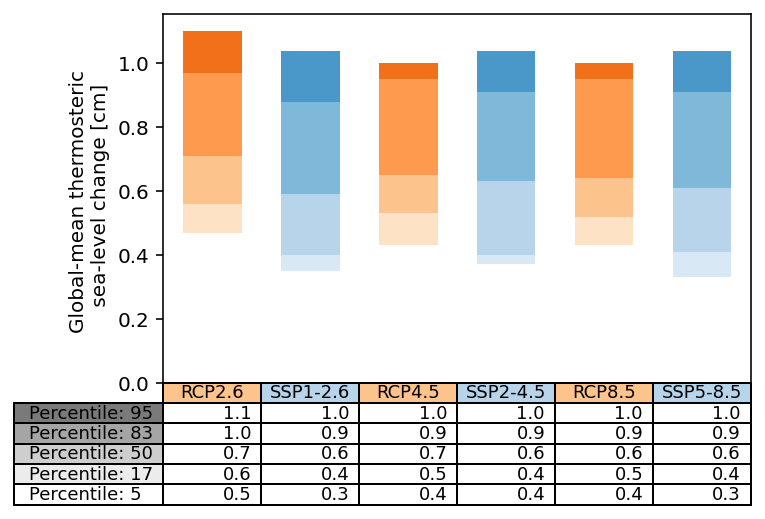

In [95]:
fig, ax = plt.subplots(1)

ax = summary_fig_and_table(ax, summary2_df, colors='alternate', vlines=False)
ax.set_ylabel('Global-mean thermosteric \n sea-level change [cm]');

# Adjust layout to make room for the table:
# Only used when exporting the figure
plt.subplots_adjust(left=0.22, bottom=0.24)

#plt.savefig(f'../figures/zostoga_comp_bars.pdf', dpi=150)

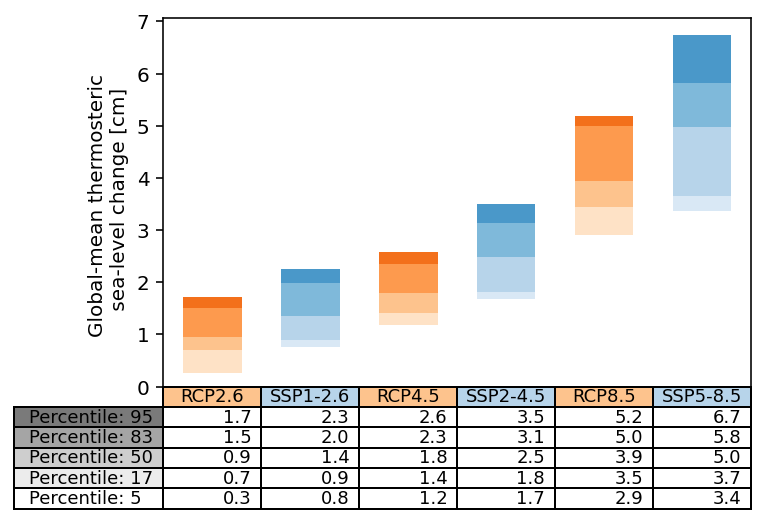

In [89]:
fig, ax = plt.subplots(1)

ax = summary_fig_and_table(ax, summary2_df, colors='alternate', vlines=False)
ax.set_ylabel('Global-mean thermosteric \n sea-level change [cm]');

# Adjust layout to make room for the table:
# Only used when exporting the figure
plt.subplots_adjust(left=0.22, bottom=0.24)

#plt.savefig(f'../figures/zostoga_comp_bars.pdf', dpi=150)

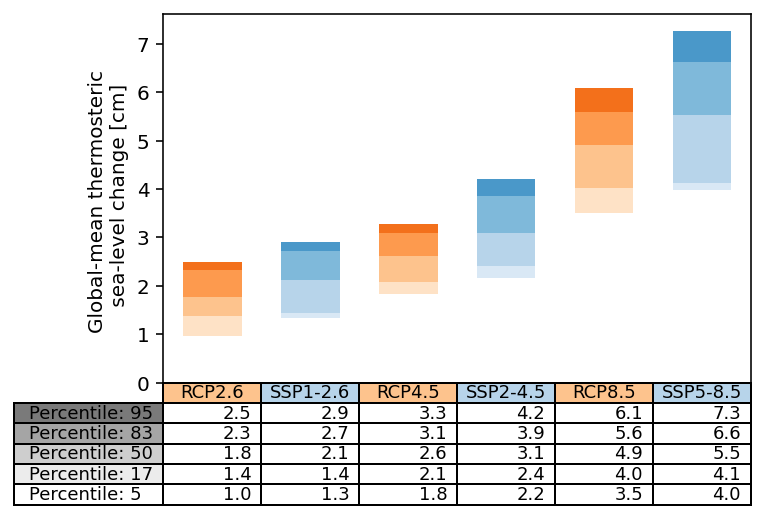

In [83]:
fig, ax = plt.subplots(1)

ax = summary_fig_and_table(ax, summary2_df, colors='alternate', vlines=False)
ax.set_ylabel('Global-mean thermosteric \n sea-level change [cm]');

# Adjust layout to make room for the table:
# Only used when exporting the figure
plt.subplots_adjust(left=0.22, bottom=0.24)

#plt.savefig(f'../figures/zostoga_comp_bars.pdf', dpi=150)

It seems that the difference between CMIP6 and CMIP5 is larger when the reference period is 1880-1900 than when it is 1986-2005. It is not clear why because there is not much difference between the two ensembles between 1880-1900 and 1986-2005. 

Need to check the time series to see what is hapenning.